In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# PARAMETROS

Z = 4     # Zona sismica 1, 2, 3, 4
U = "A2"  # Factor de Uso A1,A2, B, C, D
Soil = "S2"  # Tipo de Suelo S0, S1, S2, S3

Tn = np.arange(0, 8, 0.1)

In [33]:

def Espectro_E030_Peru(Z, U, S):
    # ZONA SISMICA
    if Z == 1:
        Z = 0.10
    elif Z == 2:
        Z = 0.25
    elif Z == 3:
        Z = 0.35
    elif Z == 4:
        Z = 0.45

    # FACTOR DE USO
    if U == 'A1':
        U = 2.0         # min 1.50
    elif U == 'A2':
        U = 1.50
    elif U == 'B':
        U = 1.30
    elif U == 'C':
        U = 1.20        # Criterio del proyectista

    # TIPO DE SUELO
    if Soil == "S0":
        S, Tp, Tl = 0.80, 0.30, 3.00
    elif Soil == "S1":
        S, Tp, Tl = 1.00, 0.40, 2.50
    elif Soil == "S2":
        Tp, Tl = 0.60, 2.00
        if Z == 1:
            S = 1.60
        elif Z == 2:
            S = 1.20
        elif Z == 3:
            S = 1.15
        elif Z == 4:
            S = 1.05
    elif Soil == "S3":
        Tp, Tl = 1.00, 1.60
        if Z == 1:
            S = 2.00
        elif Z == 2:
            S = 1.40
        elif Z == 3:
            S = 1.20
        elif Z == 4:
            S = 1.10
    S = 1.05

    # FACTOR DE AMPLIFICACION SISMICA
    C = []
    for t in Tn:
        if t <= Tp:
            C.append(2.50)
        elif Tp < t <= Tl:
            C.append(2.50*(Tp/t))
        elif t > Tl:
            C.append(2.50*(Tp*Tl/t**2))

    # COEFICIENTE DE REDUCCION DE FUERZAS SISMICAS
    # Iregularidades en planta
    Ip = 1.00
    # Iregularidades en altura
    Ia = 1.00
    # Sistema Estructural
    Ro = 6
    # Coeficiente de Reduccion de Fuerzas Sismicas
    R = Ro*Tp*Tl

    # ESPECTROS DE DISEÑO
    Sa = [Z*U*S*c/R for c in C]

    return Sa

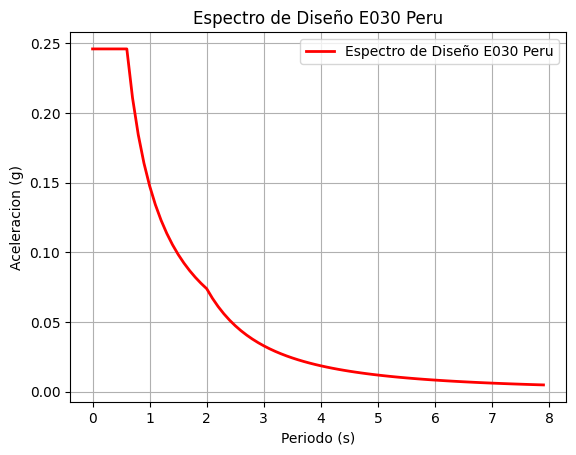

In [36]:
Sa = Espectro_E030_Peru(Z, U, Soil)
plt.plot(Tn, Sa, linestyle='-', linewidth=2, color='r',
         label='Espectro de Diseño E030 Peru')
plt.xlabel('Periodo (s)')
plt.ylabel('Aceleracion (g)')
plt.title('Espectro de Diseño E030 Peru')
plt.grid(True)
plt.legend()
plt.show()